# Curve Fitting With Python

Curve fitting is a type of optimization that finds an optimal set of parameters for a defined function that best fits a given set of observations.

Unlike supervised learning, curve fitting requires that you define the function that maps examples of inputs to outputs.

The mapping function, also called the basis function can have any form you like, including a straight line (linear regression), a curved line (polynomial regression), and much more. This provides the flexibility and control to define the form of the curve, where an optimization process is used to find the specific optimal parameters of the function.

In this tutorial, you will discover how to perform curve fitting in Python.

After completing this tutorial, you will know:

Curve fitting involves finding the optimal parameters to a function that maps examples of inputs to outputs.
The SciPy Python library provides an API to fit a curve to a dataset.
How to use curve fitting in SciPy to fit a range of different curves to a set of observations.
Kick-start your project with my new book Optimization for Machine Learning, including step-by-step tutorials and the Python source code files for all examples.

Let’s get started.

# Curve Fitting

Curve fitting is an optimization problem that finds a line that best fits a collection of observations.

It is easiest to think about curve fitting in two dimensions, such as a graph.

Consider that we have collected examples of data from the problem domain with inputs and outputs.

The x-axis is the independent variable or the input to the function. The y-axis is the dependent variable or the output of the function. We don’t know the form of the function that maps examples of inputs to outputs, but we suspect that we can approximate the function with a standard function form.

Curve fitting involves first defining the functional form of the mapping function (also called the basis function or objective function), then searching for the parameters to the function that result in the minimum error.

Error is calculated by using the observations from the domain and passing the inputs to our candidate mapping function and calculating the output, then comparing the calculated output to the observed output.

Once fit, we can use the mapping function to interpolate or extrapolate new points in the domain. It is common to run a sequence of input values through the mapping function to calculate a sequence of outputs, then create a line plot of the result to show how output varies with input and how well the line fits the observed points.

The key to curve fitting is the form of the mapping function.

A straight line between inputs and outputs can be defined as follows:

`y = a * x + b`

Where y is the calculated output, x is the input, and a and b are parameters of the mapping function found using an optimization algorithm.

This is called a linear equation because it is a weighted sum of the inputs.

In a linear regression model, these parameters are referred to as coefficients; in a neural network, they are referred to as weights.

This equation can be generalized to any number of inputs, meaning that the notion of curve fitting is not limited to two-dimensions (one input and one output), but could have many input variables.

For example, a line mapping function for two input variables may look as follows:

`y = a1 * x1 + a2 * x2 + b`

The equation does not have to be a straight line.

We can add curves in the mapping function by adding exponents. For example, we can add a squared version of the input weighted by another parameter:

`y = a * x + b * x^2 + c`

This is called polynomial regression, and the squared term means it is a second-degree polynomial.

So far, linear equations of this type can be fit by minimizing least squares and can be calculated analytically. This means we can find the optimal values of the parameters using a little linear algebra.

We might also want to add other mathematical functions to the equation, such as sine, cosine, and more. Each term is weighted with a parameter and added to the whole to give the output; for example:

`y = a * sin(b * x) + c`

Adding arbitrary mathematical functions to our mapping function generally means we cannot calculate the parameters analytically, and instead, we will need to use an iterative optimization algorithm.

This is called nonlinear least squares, as the objective function is no longer convex (it’s nonlinear) and not as easy to solve.

Now that we are familiar with curve fitting, let’s look at how we might perform curve fitting in Python.

# Curve Fitting Python API
We can perform curve fitting for our dataset in Python.

The SciPy open source library provides the curve_fit() function for curve fitting via nonlinear least squares.

The function takes the same input and output data as arguments, as well as the name of the mapping function to use.

The mapping function must take examples of input data and some number of arguments. These remaining arguments will be the coefficients or weight constants that will be optimized by a nonlinear least squares optimization process.

For example, we may have some observations from our domain loaded as input variables x and output variables y.

```
# load input variables from a file
x_values = ...
y_values = ...
```

Next, we need to design a mapping function to fit a line to the data and implement it as a Python function that takes inputs and the arguments.

It may be a straight line, in which case it would look as follows:
```
# objective function
def objective(x, a, b, c):
    return a * x + b
```

We can then call the curve_fit() function to fit a straight line to the dataset using our defined function.

The function curve_fit() returns the optimal values for the mapping function, e.g, the coefficient values. It also returns a covariance matrix for the estimated parameters, but we can ignore that for now.

```
# fit curve
popt, _ = curve_fit(objective, x_values, y_values)
```

Once fit, we can use the optimal parameters and our mapping function objective() to calculate the output for any arbitrary input.

This might include the output for the examples we have already collected from the domain, it might include new values that interpolate observed values, or it might include extrapolated values outside of the limits of what was observed.

```
# define new input values
x_new = ...
# unpack optima parameters for the objective function
a, b, c = popt
# use optimal parameters to calculate new values
y_new = objective(x_new, a, b, c)
```

Now that we are familiar with using the curve fitting API, let’s look at a worked example.

# Curve Fitting Worked Example
We will develop a curve to fit some real world observations of economic data.

In this example, we will use the so-called “Longley’s Economic Regression” dataset; you can learn more about it here:

* [Longley’s Economic Regression (longley.csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv)
* [Longley’s Economic Regression Description (longley.names)](https://github.com/jbrownlee/Datasets/blob/master/longley.names)

We will download the dataset automatically as part of the worked example.

There are seven input variables and 16 rows of data, where each row defines a summary of economic details for a year between 1947 to 1962.

In this example, we will explore fitting a line between population size and the number of people employed for each year.

The example below loads the dataset from the URL, selects the input variable as “population,” and the output variable as “employed” and creates a scatter plot.

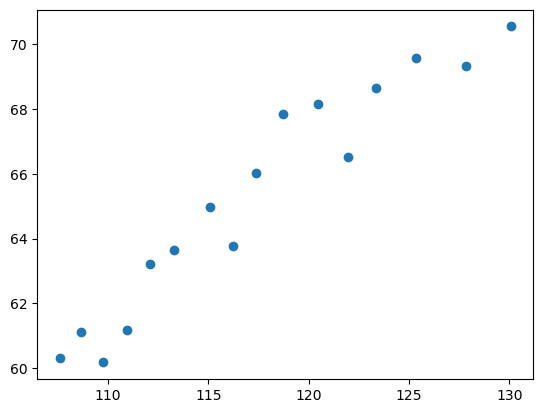

In [1]:
# plot "Population" vs "Employed"
from pandas import read_csv
from matplotlib import pyplot

# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
x, y = data[:, 4], data[:, -1]

# plot input vs output
pyplot.scatter(x, y)
pyplot.show()

Running the example loads the dataset, selects the variables, and creates a scatter plot.

We can see that there is a relationship between the two variables. Specifically, that as the population increases, the total number of employees increases.

It is not unreasonable to think we can fit a line to this data.

First, we will try fitting a straight line to this data, as follows:

In [2]:
# define the true objective function
def objective(x, a, b):
    return a *x + b

We can use curve fitting to find the optimal values of “a” and “b” and summarize the values that were found:

In [3]:
from scipy.optimize import curve_fit

# curve fit
popt, _ = curve_fit(objective, x, y)
# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

y = 0.48488 * x + 8.38067


We can then create a scatter plot as before.

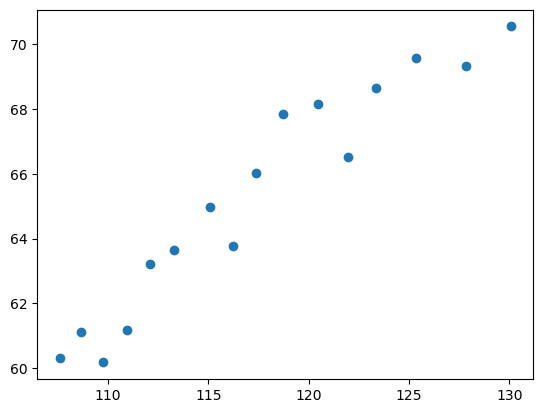

In [4]:
# plot input vs output
pyplot.scatter(x, y)

On top of the scatter plot, we can draw a line for the function with the optimized parameter values.

This involves first defining a sequence of input values between the minimum and maximum values observed in the dataset (e.g. between about 120 and about 130).

In [5]:
from numpy import arange

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

We can then calculate the output value for each input value.

In [6]:
# calculate the output for the range
y_line = objective(x_line, a, b)

Then create a line plot of the inputs vs. the outputs to see a line:

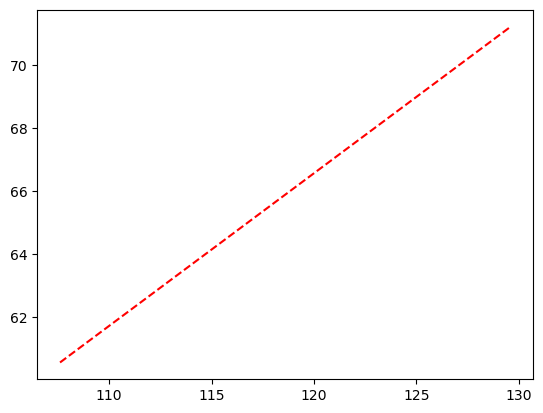

In [7]:
# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')

Tying this together, the example below uses curve fitting to find the parameters of a straight line for our economic data.

y = 0.48488 * x + 8.38067


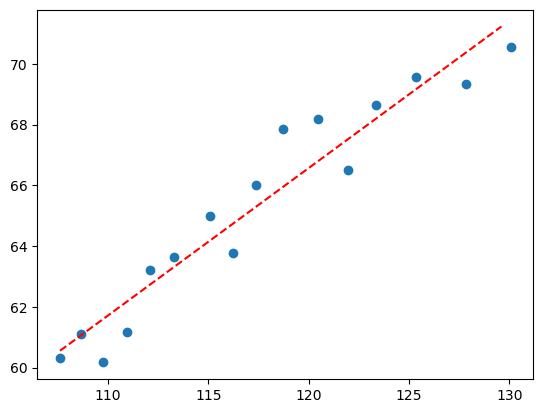

In [8]:
# fit a straight line to the economic data
from numpy import arange
from pandas import read_csv
from matplotlib import pyplot
from pandas import read_csv
from scipy.optimize import curve_fit 
 
# define the true objective function
def objective(x, a, b):
    return a * x + b
 
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
x, y = data[:, 4], data[:, -1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

Running the example performs curve fitting and finds the optimal parameters to our objective function.

First, the values of the parameters are reported.

`y = 0.48488 * x + 8.38067`

Next, a plot is created showing the original data and the line that was fit to the data.

We can see that it is a reasonably good fit.

# Plot of Straight Line Fit to Economic Dataset

So far, this is not very exciting as we could achieve the same effect by fitting a linear regression model on the dataset.

Let’s try a polynomial regression model by adding squared terms to the objective function.

In [9]:
# define the true objective function
def objective(x, a, b, c):
	return a * x + b * x**2 + c

Tying this together, the complete example is listed below.

In [10]:
# fit a second degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot

In [11]:
 # load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
x, y = data[:, 4], data[:, -1]

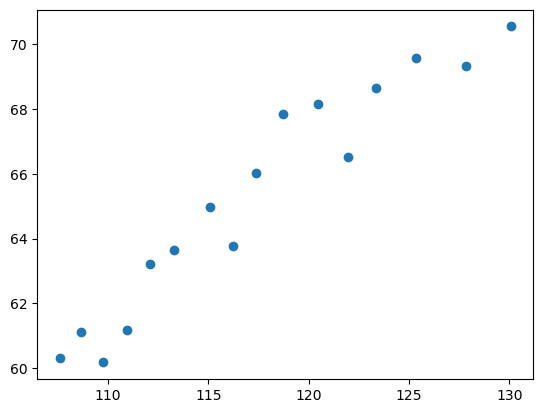

In [12]:
# plot input vs output
pyplot.scatter(x, y)

In [13]:
# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

In [14]:
# curve fit
popt, pcov = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c = popt
print('y = %.5f * x + %.5f * x^2 + %.5f' % (a, b, c))

y = 3.25444 * x + -0.01170 * x^2 + -155.02799


In [15]:
import numpy
def calc_r_squared(xdata,ydata,popt, f):
    # https://stackoverflow.com/a/37899817
    # You can get the residual sum of squares (ss_tot) with
    residuals = ydata - f(xdata, *popt)
    ss_res = numpy.sum(residuals**2)

    #You can get the total sum of squares (ss_tot) with
    ss_tot = numpy.sum((ydata-numpy.mean(ydata))**2)

    #And finally, the r_squared-value with,
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared


In [16]:
calc_r_squared(x,y,popt,objective)

0.9439253893617803

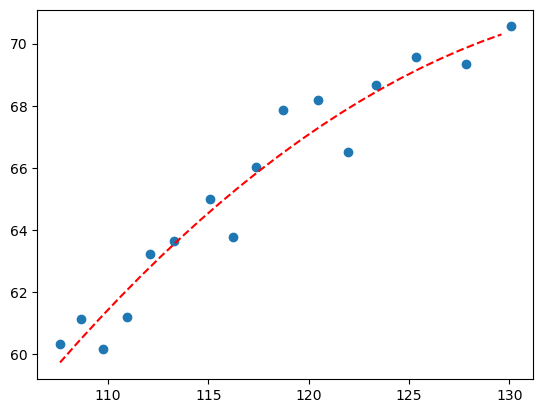

In [17]:
# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

First the optimal parameters are reported.

`y = 3.25443 * x + -0.01170 * x^2 + -155.02783`

Next, a plot is created showing the line in the context of the observed values from the domain.

We can see that the second-degree polynomial equation that we defined is visually a better fit for the data than the straight line that we tested first.

# Plot of Second Degree Polynomial Fit to Economic Dataset

We could keep going and add more polynomial terms to the equation to better fit the curve.

For example, below is an example of a fifth-degree polynomial fit to the data.

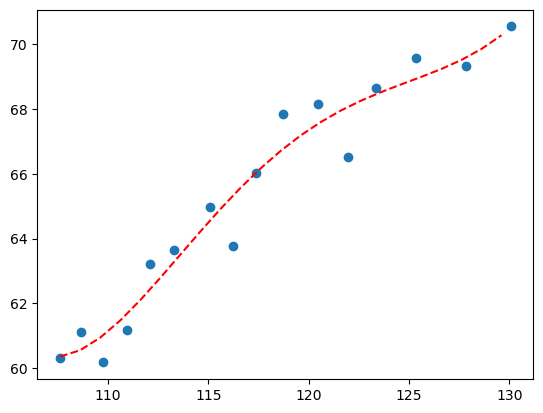

In [18]:
# fit a fifth degree polynomial to the economic data
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f
 
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
x, y = data[:, 4], data[:, -1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d, e, f = popt

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c, d, e, f)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [19]:
calc_r_squared(x,y,popt,objective)

0.9505810350173182

Running the example fits the curve and plots the result, again capturing slightly more nuance in how the relationship in the data changes over time.

# Plot of Fifth Degree Polynomial Fit to Economic Dataset

Importantly, we are not limited to linear regression or polynomial regression. We can use any arbitrary basis function.

For example, perhaps we want a line that has wiggles to capture the short-term movement in observation. We could add a sine curve to the equation and find the parameters that best integrate this element in the equation.

For example, an arbitrary function that uses a sine wave and a second degree polynomial is listed below:

In [20]:
# define the true objective function
def objective(x, a, b, c, d):
	return a * sin(b - x) + c * x**2 + d

The complete example of fitting a curve using this basis function is listed below.

[8.83095297e-01 1.48622917e+00 2.05997114e-03 3.69046170e+01]


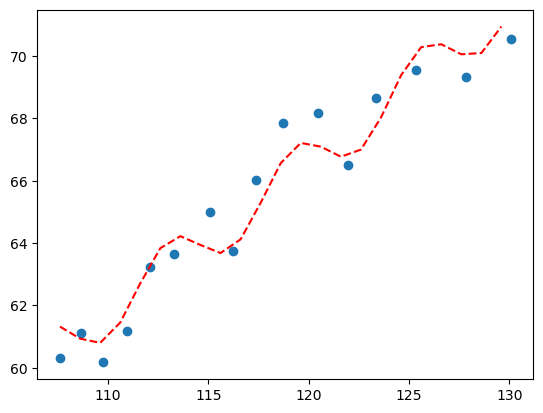

In [21]:
# fit a line to the economic data
from numpy import sin
from numpy import sqrt
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot
 
# define the true objective function
def objective(x, a, b, c, d):
    return a * sin(b - x) + c * x**2 + d
 
# load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/longley.csv'
dataframe = read_csv(url, header=None)
data = dataframe.values

# choose the input and output variables
x, y = data[:, 4], data[:, -1]

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b, c, d = popt
print(popt)

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b, c, d)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='red')
pyplot.show()

In [22]:
calc_r_squared(x,y,popt,objective)

0.9463640408085512

Running the example fits a curve and plots the result.

We can see that adding a sine wave has the desired effect showing a periodic wiggle with an upward trend that provides another way of capturing the relationships in the data.

# How do you choose the best fit?

If you want the best fit, you would model the problem as a regression supervised learning problem and test a suite of algorithms in order to discover which is best at minimizing the error.

In this case, curve fitting is appropriate when you want to define the function explicitly, then discover the parameters of your function that best fit a line to the data.